In [1]:
#Load libraries
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#Load dataset 
wine = pd.read_csv("C:\\Users\\abhil\\OneDrive\\Desktop\\New folder\\wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Exploratory Data Analysis

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
wine.drop('Type',axis=1,inplace=True)

In [5]:
wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
wine.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Treating outliers

<Axes: >

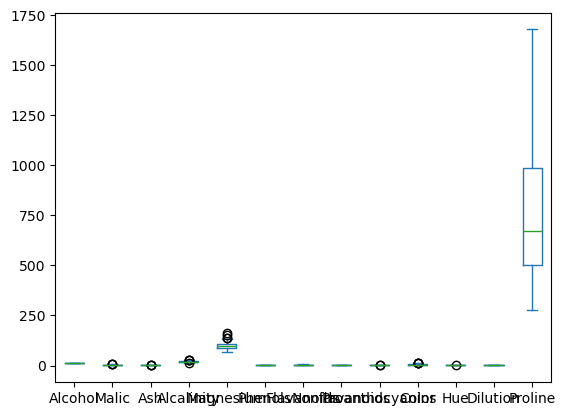

In [7]:
wine.plot(kind='box')

## Removing outliers

In [8]:
Q1 = wine['Magnesium'].quantile(0.25)
Q3 = wine['Magnesium'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = wine[(wine['Magnesium'] >= lower_bound) & (wine['Magnesium'] <= upper_bound)]

In [9]:
Q1 = wine['Malic'].quantile(0.25)
Q3 = wine['Malic'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
wine = wine[(wine['Malic'] >= lower_bound) & (wine['Malic'] <= upper_bound)]

In [10]:
Q1 = wine['Ash'].quantile(0.25)
Q3 = wine['Ash'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = wine[(wine['Ash'] >= lower_bound) & (wine['Ash'] <= upper_bound)]

In [11]:
Q1 = wine['Alcalinity'].quantile(0.25)
Q3 = wine['Alcalinity'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = wine[(wine['Alcalinity'] >= lower_bound) & (wine['Alcalinity'] <= upper_bound)]

In [12]:
Q1 = wine['Proanthocyanins'].quantile(0.25)
Q3 = wine['Proanthocyanins'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = wine[(wine['Proanthocyanins'] >= lower_bound) & (wine['Proanthocyanins'] <= upper_bound)]

In [13]:
Q1 = wine['Color'].quantile(0.25)
Q3 = wine['Color'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = wine[(wine['Color'] >= lower_bound) & (wine['Color'] <= upper_bound)]

In [14]:
Q1 = wine['Hue'].quantile(0.25)
Q3 = wine['Hue'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = wine[(wine['Hue'] >= lower_bound) & (wine['Hue'] <= upper_bound)]

In [15]:
wine.reset_index(drop=True,inplace=True)

In [16]:
wine.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,12.998971,2.279486,2.365829,19.446286,99.868571,2.299657,2.042000,0.359771,1.594343,5.057371,0.961349,2.619143,750.354286
std,0.816238,1.037469,0.275264,3.337591,14.359501,0.627833,0.994599,0.123176,0.573774,2.322123,0.228354,0.708592,315.882089
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.350000,1.595000,2.210000,17.150000,88.000000,1.745000,1.235000,0.265000,1.250000,3.230000,0.790000,1.980000,501.000000
50%,13.050000,1.830000,2.360000,19.400000,98.000000,2.360000,2.140000,0.340000,1.560000,4.680000,0.980000,2.780000,675.000000
75%,13.675000,3.010000,2.555000,21.500000,107.500000,2.800000,2.885000,0.430000,1.950000,6.200000,1.120000,3.175000,987.500000
max,14.830000,5.190000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [17]:
wine.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.095752,0.215384,-0.310341,0.273646,0.293635,0.242797,-0.158455,0.139507,0.546469,-0.067329,0.074953,0.647373
Malic,0.095752,1.000000,0.172403,0.269344,-0.029968,-0.343372,-0.411942,0.271108,-0.222859,0.272128,-0.559258,-0.371863,-0.173476
Ash,0.215384,0.172403,1.000000,0.442756,0.286355,0.139227,0.130976,0.173575,0.019881,0.254968,-0.074788,0.016974,0.224544
Alcalinity,-0.310341,0.269344,0.442756,1.000000,-0.077890,-0.318169,-0.345046,0.350827,-0.193075,0.020953,-0.267308,-0.270029,-0.435907
Magnesium,0.273646,-0.029968,0.286355,-0.077890,1.000000,0.215961,0.197398,-0.258918,0.239564,0.198275,0.046935,0.066328,0.389133
Phenols,0.293635,-0.343372,0.139227,-0.318169,0.215961,1.000000,0.863820,-0.442067,0.608092,-0.046377,0.432413,0.696104,0.503402
Flavanoids,0.242797,-0.411942,0.130976,-0.345046,0.197398,0.863820,1.000000,-0.524688,0.647793,-0.162887,0.542728,0.782345,0.501092
Nonflavanoids,-0.158455,0.271108,0.173575,0.350827,-0.258918,-0.442067,-0.524688,1.000000,-0.355343,0.131543,-0.254992,-0.490758,-0.312871
Proanthocyanins,0.139507,-0.222859,0.019881,-0.193075,0.239564,0.608092,0.647793,-0.355343,1.000000,-0.015207,0.293911,0.511860,0.335334
Color,0.546469,0.272128,0.254968,0.020953,0.198275,-0.046377,-0.162887,0.131543,-0.015207,1.000000,-0.527490,-0.424295,0.313003


# 2. Dimensionality Reduction with PCA

In [18]:
# Normalizing the numerical data
std = StandardScaler()
wine_normal=std.fit_transform(wine)
wine_normal

array([[ 1.51250199, -0.55049315,  0.23379554, ...,  0.34541648,
         1.84110252,  0.99894418],
       [ 0.24699355, -0.48282768, -0.82276046, ...,  0.38933387,
         1.10514676,  0.95132184],
       [ 0.19784759,  0.0778291 ,  1.10818672, ...,  0.3014991 ,
         0.77962786,  1.37992283],
       ...,
       [ 0.33299898,  1.93379639, -0.38556487, ..., -1.63086571,
        -1.4990044 ,  0.26873509],
       [ 0.21013408,  0.30015852,  0.01519775, ..., -1.58694833,
        -1.41408643,  0.2846092 ],
       [ 1.38963709,  1.75979945,  1.36321748, ..., -1.54303094,
        -1.44239242, -0.604341  ]])

In [19]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)
pca_components=pd.DataFrame(pca_values,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13"])
pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-3.290741,-1.406958,-0.185128,-0.019319,0.737630,-0.129319,0.587617,0.088238,0.702235,-0.964045,-0.497783,0.550570,-0.062283
1,-2.161844,0.355816,-2.035067,-0.353722,-0.094178,-0.930284,0.091518,1.012514,-0.305367,-0.160006,-0.150358,0.396459,0.000710
2,-2.487367,-1.033735,0.961572,0.661323,-0.500826,0.478897,0.452570,-0.382765,-1.147548,-0.137322,-0.289090,0.007577,0.020837
3,-3.741180,-2.724187,-0.208165,0.415462,-0.483463,0.084608,-0.391940,0.646772,0.051323,-0.293329,0.729651,-0.252016,-0.365485
4,-0.979120,-0.880542,2.021851,-0.271267,0.414691,-0.387683,0.498875,0.417505,0.319642,0.139953,-0.503996,-0.220755,-0.079282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2.502491,-2.211527,-0.882389,-0.212259,-0.747311,0.603258,-0.827324,-0.284009,0.329740,-0.219420,-0.624982,0.119962,-0.262623
171,2.662378,-1.829501,0.231728,0.447776,0.100154,-0.084653,0.212155,-0.568410,-0.085048,0.201477,0.288494,-0.297628,-0.187845
172,2.750248,-2.841848,-0.915974,0.729763,1.048585,0.278754,0.729480,0.027836,0.008008,0.249989,0.561196,0.682064,0.060352
173,2.432104,-2.316876,-0.516895,-0.404063,0.879211,1.261317,0.592265,0.397789,0.049414,-0.488815,0.275817,0.359146,-0.036457


In [20]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.35985335, 0.1932402 , 0.11155142, 0.06847403, 0.06619839,
       0.05013726, 0.04265641, 0.02719133, 0.02236157, 0.0196771 ,
       0.01746754, 0.01313002, 0.00806138])

In [27]:
# Cumulative variance
cumsum = np.cumsum(np.round(var,decimals = 4)*100)
cumsum

array([ 35.99,  55.31,  66.47,  73.32,  79.94,  84.95,  89.22,  91.94,
        94.18,  96.15,  97.9 ,  99.21, 100.02])

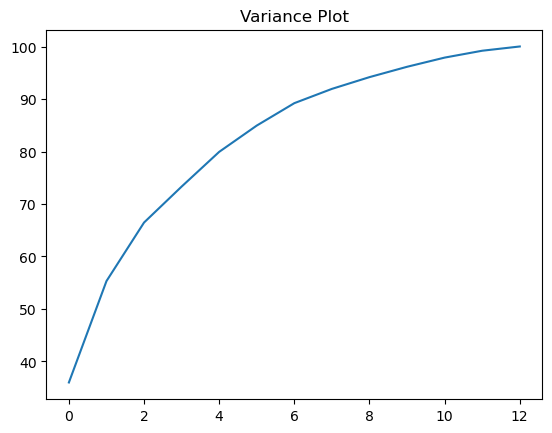

In [22]:
# Variance plot for PCA components obtained  Scree plot
plt.plot(var1)
plt.title('Variance Plot')
plt.show()

In [23]:
pca.explained_variance_ratio_*100

array([35.9853347 , 19.3240203 , 11.15514189,  6.84740261,  6.61983891,
        5.01372596,  4.26564096,  2.71913322,  2.23615689,  1.96770975,
        1.74675442,  1.31300196,  0.80613843])

In [24]:
variances=pd.DataFrame(pca_components.var(),columns=["variance"])

In [25]:
pca.explained_variance_

array([4.70497911, 2.52656013, 1.45850275, 0.89527821, 0.86552491,
       0.65553026, 0.5577203 , 0.35551886, 0.29237109, 0.2572724 ,
       0.22838312, 0.17167123, 0.10540028])

In [26]:
percentage_variance=(pca_components.var()/np.sum(pca_components.var()))*100
percentage_variance

PC1     35.985335
PC2     19.324020
PC3     11.155142
PC4      6.847403
PC5      6.619839
PC6      5.013726
PC7      4.265641
PC8      2.719133
PC9      2.236157
PC10     1.967710
PC11     1.746754
PC12     1.313002
PC13     0.806138
dtype: float64

In [28]:
variances=pd.DataFrame()
variances["percentage"]=pd.Series(pca.explained_variance_ratio_*100)
variances["cumsum"]=pd.Series(cumsum)
variances

,percentage,cumsum
0,35.985335,35.99
1,19.324020,55.31
2,11.155142,66.47
3,6.847403,73.32
4,6.619839,79.94
5,5.013726,84.95
6,4.265641,89.22
7,2.719133,91.94
8,2.236157,94.18
9,1.967710,96.15


# 3. Clustering with Original Data

### Kmeans

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(wine_normal)

C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [31]:
kmeans.inertia_

1633.728866156414

In [32]:
import warnings
warnings.filterwarnings("ignore")
inertia=[]
k=list(range(2,6))
for i in k:
    kc=KMeans(n_clusters=i)
    kc.fit(wine_normal)
    inertia.append(kc.inertia_)
    print(i,inertia)

2 [1633.728866156414]
3 [1633.728866156414, 1258.8414340570039]
4 [1633.728866156414, 1258.8414340570039, 1169.123150699164]
5 [1633.728866156414, 1258.8414340570039, 1169.123150699164, 1109.943637663664]


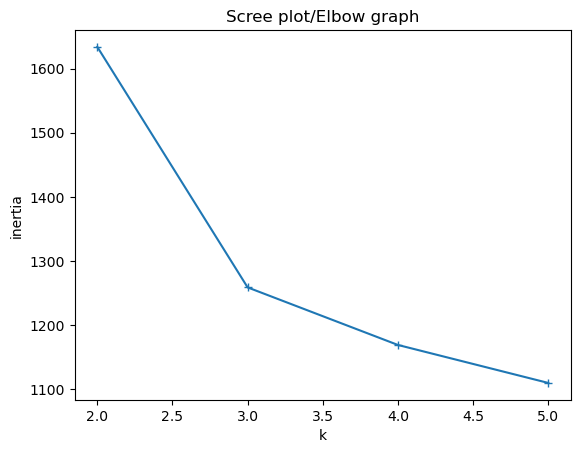

In [33]:
plt.plot(k,inertia,marker='+')
plt.title("Scree plot/Elbow graph")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(wine_normal)
labels_3=kmeans.labels_
labels_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
from sklearn.metrics import silhouette_score
ss_3=silhouette_score(wine_normal,labels_3)
ss_3

0.28205374839209685

In [36]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(wine_normal)
labels_4=kmeans.labels_
labels_4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 0, 3,
       3, 3, 0, 0, 0, 3, 3, 1, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 0, 3, 0, 3, 3, 1, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
ss_4=silhouette_score(wine_normal,labels_4)
ss_4

0.2553159119116239

In [38]:
print(ss_3,ss_4)

0.28205374839209685 0.2553159119116239


In [39]:
#Assign clusters to the data set
wine['clusterid'] = labels_3

In [40]:
pd.Series(labels_3).value_counts()

0    64
2    63
1    48
Name: count, dtype: int64

In [41]:
wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,1
171,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
172,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
173,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [42]:
wine.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,13.632812,1.969531,2.447031,17.410937,109.078125,2.817188,2.958281,0.290625,1.944219,5.380781,1.068750,3.148594,1088.781250
1,1,13.145000,3.253125,2.420625,21.270833,98.770833,1.674792,0.815417,0.445208,1.159583,7.302500,0.684375,1.698125,622.229167
2,2,12.243810,1.852540,2.241587,20.123810,91.349206,2.250000,2.045714,0.364921,1.570159,3.018254,1.063270,2.783016,504.174603


### DBSCAN

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
dbscan = DBSCAN(eps=2.5, min_samples=15)
labels=dbscan.fit_predict(wine_normal)

In [45]:
pd.Series(labels).value_counts()

 0    88
-1    63
 1    24
Name: count, dtype: int64

In [46]:
silhouette_score(wine_normal,labels)

0.12911840353817286

In [47]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,
       -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1,
        0, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1, -1,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1], dtype=int64)

In [48]:
wine['clusterid1']=dbscan.labels_
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid,clusterid1
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0


In [49]:
wine.groupby('clusterid1').agg(['mean']).reset_index()

,clusterid1,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,12.587460,2.383175,2.391429,20.538095,101.190476,2.094127,1.696190,0.393175,1.536349,4.498095,0.942317,2.331587,606.714286,1.301587
1,0,13.206023,1.844205,2.333523,18.172727,99.147727,2.617500,2.647386,0.306023,1.742727,4.599659,1.055114,3.080909,880.897727,0.772727
2,1,13.320000,3.603333,2.417083,21.250000,99.041667,1.673750,0.730000,0.469167,1.202500,8.203750,0.667500,1.680833,648.750000,1.000000


### Hierachical clustering

In [50]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [51]:
dm=sch.linkage(wine_normal, metric='euclidean',method='complete')

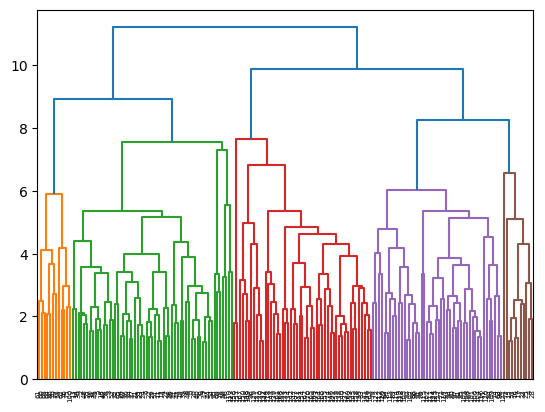

In [52]:
dendrogram = sch.dendrogram(dm)
plt.show()

In [53]:
Hierachical = AgglomerativeClustering(n_clusters=4, metric= 'euclidean', linkage = 'complete')
Hierachical.fit(wine_normal)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [54]:
Hierachical.labels_
pd.Series(Hierachical.labels_).value_counts()

1    57
0    57
2    49
3    12
Name: count, dtype: int64

In [55]:
wine['clusterid2'] = Hierachical.labels_

In [56]:
wine.groupby(['clusterid2']).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid,clusterid1
clusterid2,,,,,,,,,,,,,,,
0,12.442456,1.885088,2.389649,21.050877,94.666667,2.416842,2.325263,0.369825,1.643158,3.331754,1.069123,2.975263,592.824561,1.614035,-0.350877
1,13.565789,2.020702,2.356667,16.712281,105.684211,2.802281,2.929298,0.272632,2.044211,5.287193,1.046140,3.142281,1057.000000,0.140351,-0.157895
2,13.117755,3.230000,2.427143,21.275510,99.489796,1.673265,0.818980,0.438980,1.167755,7.204490,0.689796,1.709592,622.285714,1.020408,-0.020408
3,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000,2.000000,-0.750000


### Visualization

In [57]:
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster
wine1= TSNE(n_components=2).fit_transform(wine_normal)
cluster.tsneplot(score=wine1)
pd.DataFrame(wine1)

,0,1
0,-12.819550,-0.905575
1,-8.055716,5.162189
2,-12.145865,4.145747
3,-14.297805,1.438565
4,-7.295838,0.456015
...,...,...
170,13.233787,-2.796037
171,12.963536,-2.227732
172,12.164683,-3.596722
173,12.683536,-3.468052


#### Visualization for Kmeans clustering


In [58]:
km_final= pd.concat([pd.DataFrame(wine1,columns=['Feature1','Feature2']), wine[['clusterid']]], axis = 1)

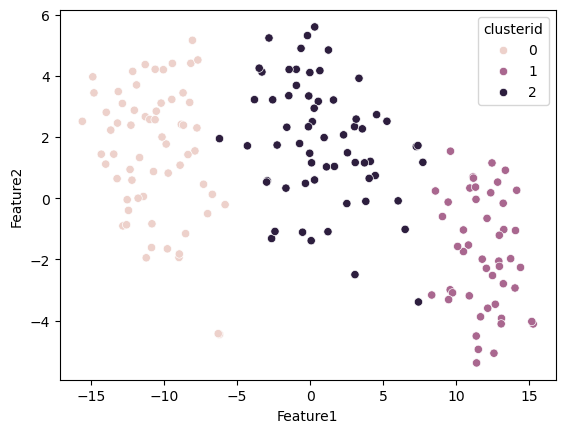

In [59]:
sns.scatterplot(data= km_final,x='Feature1',y='Feature2',hue='clusterid')
plt.show()

#### Visualization for DBSCAN clustering

In [60]:
db_final= pd.concat([pd.DataFrame(wine1,columns=['Feature1','Feature2']), wine[['clusterid1']]], axis = 1)

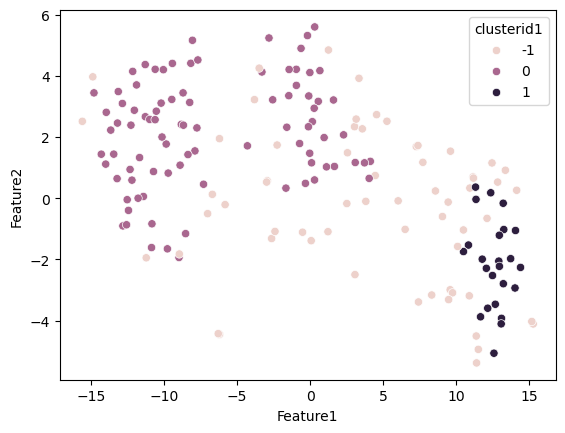

In [61]:
sns.scatterplot(data=db_final,x='Feature1',y='Feature2',hue='clusterid1')
plt.show()

### Visualization for Hiarchical clustering

In [62]:
hc_final= pd.concat([pd.DataFrame(wine1,columns=['Feature1','Feature2']), wine[['clusterid2']]], axis = 1)

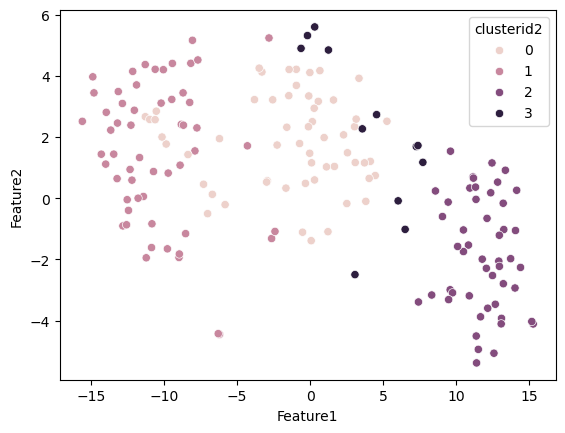

In [63]:
sns.scatterplot(data=hc_final,x='Feature1',y='Feature2',hue='clusterid2')
plt.show()

# 4. Clustering with PCA Data

## Kmeans

In [64]:
kmeans1=KMeans(n_clusters=3)
kmeans1.fit(pca_values)

KMeans(n_clusters=3)

In [65]:
kmeans1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
kmeans1.inertia_

1261.286985111077

In [67]:
import warnings
warnings.filterwarnings("ignore")
inertia=[]
k=list(range(2,9))
for i in k:
    kc1=KMeans(n_clusters=i)
    kc1.fit(pca_components)
    inertia.append(kc1.inertia_)
    print(i,inertia)

2 [1633.1031771411554]
3 [1633.1031771411554, 1258.8414340570032]
4 [1633.1031771411554, 1258.8414340570032, 1220.9662604030464]
5 [1633.1031771411554, 1258.8414340570032, 1220.9662604030464, 1111.2159927317687]
6 [1633.1031771411554, 1258.8414340570032, 1220.9662604030464, 1111.2159927317687, 1055.4284524214265]
7 [1633.1031771411554, 1258.8414340570032, 1220.9662604030464, 1111.2159927317687, 1055.4284524214265, 1005.1425187293484]
8 [1633.1031771411554, 1258.8414340570032, 1220.9662604030464, 1111.2159927317687, 1055.4284524214265, 1005.1425187293484, 980.6660883134557]


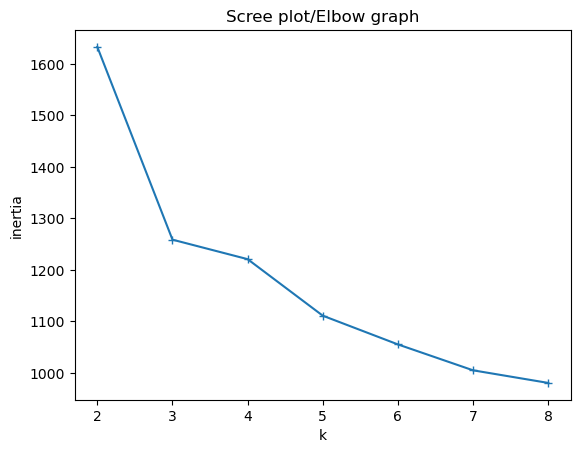

In [68]:
plt.plot(k,inertia,marker='+')
plt.title("Scree plot/Elbow graph")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [69]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(pca_components)
labels_3=kmeans1.labels_
labels_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
ss_3_pca=silhouette_score(pca_components,labels_3)
ss_3_pca

0.2840578772206743

In [71]:
#Assign clusters to the data set
pca_components['clusterid'] = labels_3

In [72]:
pd.Series(labels_3).value_counts()

1    65
0    62
2    48
Name: count, dtype: int64

In [73]:
pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,clusterid
0,-3.290741,-1.406958,-0.185128,-0.019319,0.737630,-0.129319,0.587617,0.088238,0.702235,-0.964045,-0.497783,0.550570,-0.062283,0
1,-2.161844,0.355816,-2.035067,-0.353722,-0.094178,-0.930284,0.091518,1.012514,-0.305367,-0.160006,-0.150358,0.396459,0.000710,0
2,-2.487367,-1.033735,0.961572,0.661323,-0.500826,0.478897,0.452570,-0.382765,-1.147548,-0.137322,-0.289090,0.007577,0.020837,0
3,-3.741180,-2.724187,-0.208165,0.415462,-0.483463,0.084608,-0.391940,0.646772,0.051323,-0.293329,0.729651,-0.252016,-0.365485,0
4,-0.979120,-0.880542,2.021851,-0.271267,0.414691,-0.387683,0.498875,0.417505,0.319642,0.139953,-0.503996,-0.220755,-0.079282,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2.502491,-2.211527,-0.882389,-0.212259,-0.747311,0.603258,-0.827324,-0.284009,0.329740,-0.219420,-0.624982,0.119962,-0.262623,2
171,2.662378,-1.829501,0.231728,0.447776,0.100154,-0.084653,0.212155,-0.568410,-0.085048,0.201477,0.288494,-0.297628,-0.187845,2
172,2.750248,-2.841848,-0.915974,0.729763,1.048585,0.278754,0.729480,0.027836,0.008008,0.249989,0.561196,0.682064,0.060352,2
173,2.432104,-2.316876,-0.516895,-0.404063,0.879211,1.261317,0.592265,0.397789,0.049414,-0.488815,0.275817,0.359146,-0.036457,2


In [74]:
pca_components.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,-2.246529,-0.913675,-0.009814,-0.168816,-0.072407,-0.220401,0.062200,0.022979,-0.043748,-0.077605,0.017803,0.007449,0.051331
1,1,0.107740,1.763027,0.169594,0.069552,0.042091,0.147443,-0.004921,0.000389,0.038413,0.035388,-0.010278,-0.003477,-0.006036
2,2,2.755868,-1.207269,-0.216982,0.123868,0.036527,0.085022,-0.073679,-0.030208,0.004490,0.052318,-0.009077,-0.004913,-0.058129


## DBSCAN

In [75]:
dbscan1 = DBSCAN(eps=3, min_samples= 15)
labels=dbscan.fit_predict(pca_components)

In [76]:
pd.Series(labels).value_counts()

 0    86
-1    65
 1    24
Name: count, dtype: int64

In [77]:
silhouette_score(pca_components,labels)

0.1255757376288343

In [78]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,
       -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1,
        0, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1, -1,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1], dtype=int64)

In [79]:
pca_components['clusterid1']=dbscan.labels_
pca_components.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,clusterid,clusterid1
0,-3.290741,-1.406958,-0.185128,-0.019319,0.737630,-0.129319,0.587617,0.088238,0.702235,-0.964045,-0.497783,0.550570,-0.062283,0,0
1,-2.161844,0.355816,-2.035067,-0.353722,-0.094178,-0.930284,0.091518,1.012514,-0.305367,-0.160006,-0.150358,0.396459,0.000710,0,0
2,-2.487367,-1.033735,0.961572,0.661323,-0.500826,0.478897,0.452570,-0.382765,-1.147548,-0.137322,-0.289090,0.007577,0.020837,0,0
3,-3.741180,-2.724187,-0.208165,0.415462,-0.483463,0.084608,-0.391940,0.646772,0.051323,-0.293329,0.729651,-0.252016,-0.365485,0,0
4,-0.979120,-0.880542,2.021851,-0.271267,0.414691,-0.387683,0.498875,0.417505,0.319642,0.139953,-0.503996,-0.220755,-0.079282,0,0


In [80]:
pca_components.groupby('clusterid1').agg(['mean']).reset_index()

,clusterid1,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,0.807927,0.385060,0.289868,-0.023679,0.293791,0.106805,0.148028,0.021161,-0.045384,0.088494,-0.041133,-0.109817,-0.000543,1.230769
1,0,-1.423524,0.173215,-0.138686,-0.050154,-0.180253,-0.111741,-0.144994,0.012992,0.010814,-0.099798,0.017025,0.034920,0.027377,0.383721
2,1,2.912825,-1.663559,-0.288102,0.243849,-0.149778,0.111144,0.118653,-0.103867,0.084165,0.117936,0.050397,0.172289,-0.096631,2.000000


## Hierachical clustering

In [81]:
dm=sch.linkage(pca_components, metric='euclidean',method='complete')

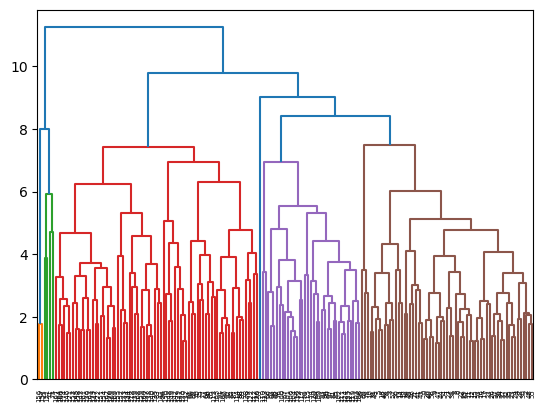

In [82]:
dendrogram = sch.dendrogram(dm)
plt.show()

In [84]:
Hierachical = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage = 'single')
Hierachical.fit(pca_components)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [85]:
Hierachical.labels_
pd.Series(Hierachical.labels_).value_counts()

0    171
1      3
2      1
Name: count, dtype: int64

In [86]:
pca_components['clusterid2'] = Hierachical.labels_

In [87]:
pca_components.groupby(['clusterid2']).mean()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,clusterid,clusterid1
clusterid2,,,,,,,,,,,,,,,
0,0.047748,-0.010703,-0.010100,-0.000444,-0.076106,-0.024807,-0.030166,0.016251,-0.009160,0.008815,-0.010304,0.000277,0.004272,0.929825,-0.216374
1,-1.872827,0.691083,-0.547897,0.121690,3.604914,1.472364,1.889415,-0.565333,0.152122,-0.519871,-0.006226,0.034701,-0.162144,0.666667,-1.000000
2,-2.546397,-0.243098,3.370762,-0.289096,2.199359,-0.175172,-0.509908,-1.082974,1.109958,0.052330,1.780624,-0.151508,-0.244164,0.000000,-1.000000


## Visualization

### Visualization for KMeans with PCA data

In [88]:
km_final_pca= pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['PC1','PC2']), pca_components[['clusterid']]], axis = 1)
km_final_pca

,PC1,PC2,clusterid
0,-3.290741,-1.406958,0
1,-2.161844,0.355816,0
2,-2.487367,-1.033735,0
3,-3.741180,-2.724187,0
4,-0.979120,-0.880542,0
...,...,...,...
170,2.502491,-2.211527,2
171,2.662378,-1.829501,2
172,2.750248,-2.841848,2
173,2.432104,-2.316876,2


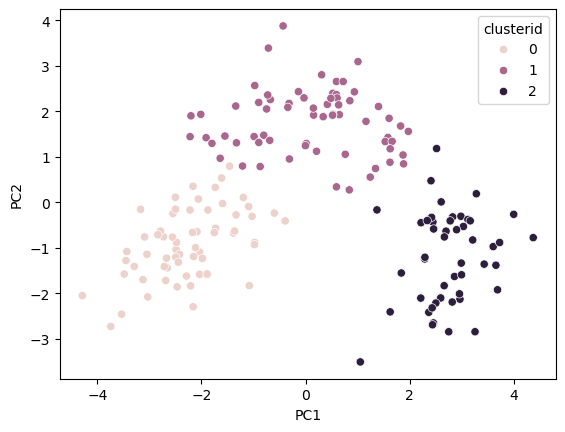

In [89]:
sns.scatterplot(data=km_final_pca,x='PC1',y='PC2',hue='clusterid')
plt.show()

### Visualization for DBSCAN with PCA data

In [90]:
db_final_pca= pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['PC1','PC2']), pca_components[['clusterid1']]], axis = 1)
db_final_pca

,PC1,PC2,clusterid1
0,-3.290741,-1.406958,0
1,-2.161844,0.355816,0
2,-2.487367,-1.033735,0
3,-3.741180,-2.724187,0
4,-0.979120,-0.880542,0
...,...,...,...
170,2.502491,-2.211527,1
171,2.662378,-1.829501,1
172,2.750248,-2.841848,1
173,2.432104,-2.316876,1


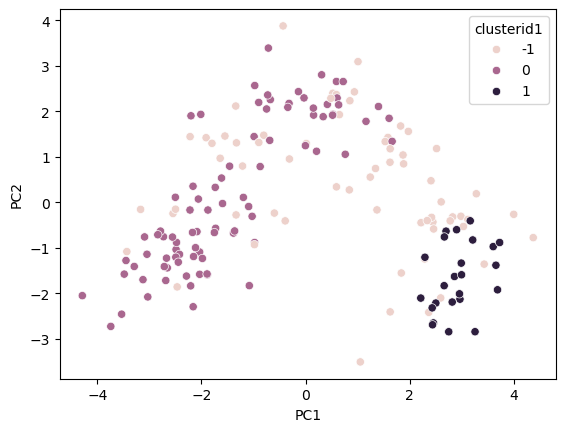

In [91]:
sns.scatterplot(data=db_final_pca,x='PC1',y='PC2',hue='clusterid1')
plt.show()

### Visualization for Hierarchical clustering PCA data

In [92]:
hc_final_pca= pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['PC1','PC2']), pca_components[['clusterid2']]], axis = 1)
hc_final_pca

,PC1,PC2,clusterid2
0,-3.290741,-1.406958,0
1,-2.161844,0.355816,0
2,-2.487367,-1.033735,0
3,-3.741180,-2.724187,0
4,-0.979120,-0.880542,0
...,...,...,...
170,2.502491,-2.211527,0
171,2.662378,-1.829501,0
172,2.750248,-2.841848,0
173,2.432104,-2.316876,0


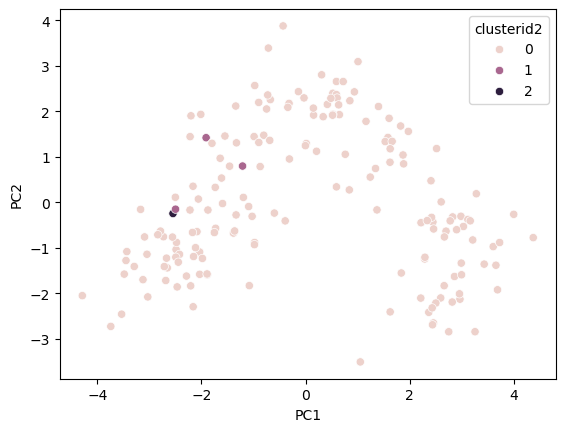

In [93]:
sns.scatterplot(data=hc_final_pca,x='PC1',y='PC2',hue='clusterid2')
plt.show()

# 5. Comparision and Analysis

In this scenario, both the inertia and silhouette scores remain consistent when clustering the original data and the PCA-transformed data. However, the visualizations differ: for the high-dimensional original data, I applied t-SNE for dimensionality reduction to better understand the cluster distribution, while in the PCA-transformed data, I plotted the clusters using the first two principal components that capture the highest variance.

The trade-off between applying PCA before clustering and clustering the original dataset directly is that PCA can enhance clustering efficiency and visualization by simplifying the data. However, this simplification might also hide details present in the original high-dimensional data. Therefore, an increase in inertia in PCA-transformed data doesn't always indicate poorer clustering but could instead signify a reduction in complexity or potential loss of information."

# 6. Conclusion and Insights

#### 1) The key finding and insights of this assignment is;

##### For original data
1. Inertia= 1633.72
2. Silhouette score= 0.285
3. Cluster size= 3

##### For PCA transformed data1. Inertia= 1261.28
2. Silhouette score= 0.284
3. Cluster size= 3

#### 2) Implication of using PCA and clustering in data analysis

##### The advantages and disadvantages of using PCA in practical implications are;

##### Advantage:
1. Dimensionality Reduction 
2. Noise Reduction 
3. Handling Multicollinearity 
4. Visualization 

##### Disadvantage:
1. Loss of Interpretability
2. Information Loss

##### The advantages and disadvantages of clustering in practical implications are;

##### Advantages:
1. Pattern Recognition
2. Data Exploration
3. Outlier detection

##### Disadvantages:
1. Interpretability Issues
2. Scalability Challenges

##### These methods are used in various sectors and fields such as
1. Finance for risk management
2. Health care to cluster the patients
3. social sciences for behavioural analysis and urban planning


#### 3) Recommendations for when to use PCA and Clustering

We can Use PCA when we need to reduce the dimensionality of high-dimensional data, extract important features, or remove noise for better visualization and analysis. 

We use clustering when we want to group similar data points, explore natural patterns in unlabeled data, or detect anomalies. Combining both is beneficial when simplifying data before clustering or for visualizing and understanding cluster characteristics.
